In [2]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import int64, float64
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Импортируем нужные функции для feature selection и модели регрессии
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

###########################_Вопросы_###########################
#
#   Не понятно почему в данных имеется так много дат вида: 0001-01-01T00:00:00, что это значит?
#   Не понятна строчка: np.Timestamp('0001-01-01T00:00:00')
#
#   В ноутбуке указано построение корреляции для данных с названием df_cleaned,
#   Но как построилась тепловая карта если они не содержат столбца is_real_incedent
#
#   Для чего мы при выделении признаков методом SelectKBest делали удаление данных:
#       X = df_cleaned.drop(['incident_id', 'is_real_incident', 'last_order_end', 'after_order_start'], axis=1)
#       y = df_cleaned['is_real_incident']
#
#
#   Разобраться при чем тут обучение модели в выделении значимых признаков, у нас как-то модель для выделения признаков должна обучиться???
#   Что это за модель?
#   Метод .fit() - обучает модель
#   selector.fit(X, y)
#
################################################################

# Загрузка данных автомобилей (файл uae_used_cars_10k[1].csv)
df = pd.read_csv('uae_used_cars_10k[1].csv')

# Это первые 20 строк
print(df.head(20))

# Информация о параметрах
print(df.info())

# В данных целевой параметр выбран – Price (цена автомобиля)



             Make                   Model  Year   Price  Mileage  \
0          toyota                   camry  2016   47819   156500   
1             kia                 sorento  2013   61250   169543   
2            mini                  cooper  2023   31861   221583   
3          nissan                  altima  2016  110322    69754   
4          toyota  land-cruiser-76-series  2020  139994    71399   
5       chevrolet               silverado  2010   43194   233934   
6       chevrolet                  camaro  2024   94100   147140   
7        cadillac                     srx  2024   30047    51876   
8   mercedes-benz                 g-class  2009  603574    32956   
9        infiniti                     q50  2013   49531    11954   
10         toyota            land-cruiser  2008  470284   143940   
11  mercedes-benz          amg-gt-4-doors  2019  479068   291481   
12          mazda                       6  2008   38078   269628   
13         nissan                 x-trail  2020 

count    1.000000e+04
mean     2.452345e+05
std      4.709773e+05
min      7.183000e+03
25%      5.035250e+04
50%      1.027660e+05
75%      2.312480e+05
max      1.468698e+07
Name: Price, dtype: float64


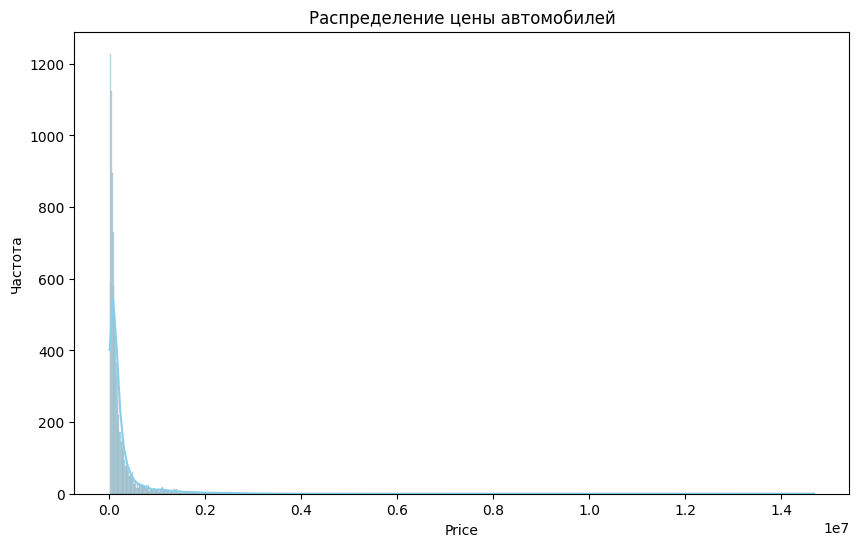

Можно заметить, что число машин с высокой ценой на рынке меньше, чем машин с низкой ценой


In [22]:
# %%
#######################_Блок 2_#######################
# Целевой параметр в данных – Price.
# Выводим описательные статистики для Price.
print(df['Price'].describe())

# Также можно построить гистограмму распределения цены
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title('Распределение цены автомобилей')
plt.xlabel('Price')
plt.ylabel('Частота')
plt.show()

print("Можно заметить, что число машин с высокой ценой на рынке меньше, чем машин с низкой ценой")


In [7]:
# %%
#######################_Блок 3_#######################
print("#################Статистические характеристики признаков:#################")
# Метод describe() возвращает статистические характеристики признаков это значит что
# он возвращает среднее значение, медиану, дисперсию, минимальное и максимальное значение, 25%, 50%, 75% квантили
#
# В выводе будет:
# std - это стандартное отклонение
# mean - среднее значение
# min - минимальное значение
# max - максимальное значение
# 25% - 25% квантиль (25% значений признака меньше этого значения)
# 50% - медиана (50% значений признака меньше этого значения)
# 75% - 75% квантиль (75% значений признака меньше этого значения)
print(df.describe().T)


#################Статистические характеристики признаков:#################
           count         mean            std      min      25%       50%  \
Year     10000.0    2014.4728       5.790839   2005.0   2009.0    2014.0   
Price    10000.0  245234.5079  470977.346779   7183.0  50352.5  102766.0   
Mileage  10000.0  155161.8717   83681.858983  10006.0  82904.0  154370.5   

               75%         max  
Year       2019.00      2024.0  
Price    231248.00  14686975.0  
Mileage  227551.25    299996.0  


In [10]:
# %%
#######################_Блок 4_#######################
print("#################_Работа с пропущенными значениями:_#################")
# Проверка на пропущенные значения
# isnull() - возвращает True если значение признака равно NaN
# sum() - возвращает количество True

# Посмотрим, есть ли пропущенные значения в каждом признаке
print(f" Исходные пропущенные значения: {df.isnull().sum()}")

# Реализуем проверку на пропущенные значения в каждом признаке и заполним пропущенные значения медианой
for col in df.columns:
    # То есть когда признак имеет пропущенные значения
    if df[col].isnull().sum() > 0:
        # Если признак имеет числовой тип, то заполняем пропуски медианой
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
            print(f"В столбце {col} заполнили пропуски значением {df[col].median()}")
        else:

            # Если признак не числовой то заполним пропуски наиболее частым значением
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)
            print(f"В столбце {col} заполнили пропуски значением {mode_val}")

print(df.isnull().sum())


#################_Работа с пропущенными значениями:_#################
 Исходные пропущенные значения: Make            0
Model           0
Year            0
Price           0
Mileage         0
Body Type       0
Cylinders       0
Transmission    0
Fuel Type       0
Color           0
Location        0
Description     0
dtype: int64
Make            0
Model           0
Year            0
Price           0
Mileage         0
Body Type       0
Cylinders       0
Transmission    0
Fuel Type       0
Color           0
Location        0
Description     0
dtype: int64


In [11]:
# %%
#######################_Блок 5_#######################
print("#################_Обработка временных признаков:_#################")
# Обработка временных признаков (это признаки, которые имеют дату и время)
# В данном наборе данных отсутствуют временные признаки, поэтому данный блок пропускается.
print("В данном наборе данных отсутствуют временные признаки, поэтому данный блок пропускается.")



#################_Обработка временных признаков:_#################
В данном наборе данных отсутствуют временные признаки, поэтому данный блок пропускается.


#################_Анализ распределения признаков:_#################


<ipython-input-23-e826a3352d3f>:51: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe, x=feature, kde=True, ax=ax, element='step', palette=['skyblue', 'salmon'])
<ipython-input-23-e826a3352d3f>:51: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe, x=feature, kde=True, ax=ax, element='step', palette=['skyblue', 'salmon'])
<ipython-input-23-e826a3352d3f>:51: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe, x=feature, kde=True, ax=ax, element='step', palette=['skyblue', 'salmon'])


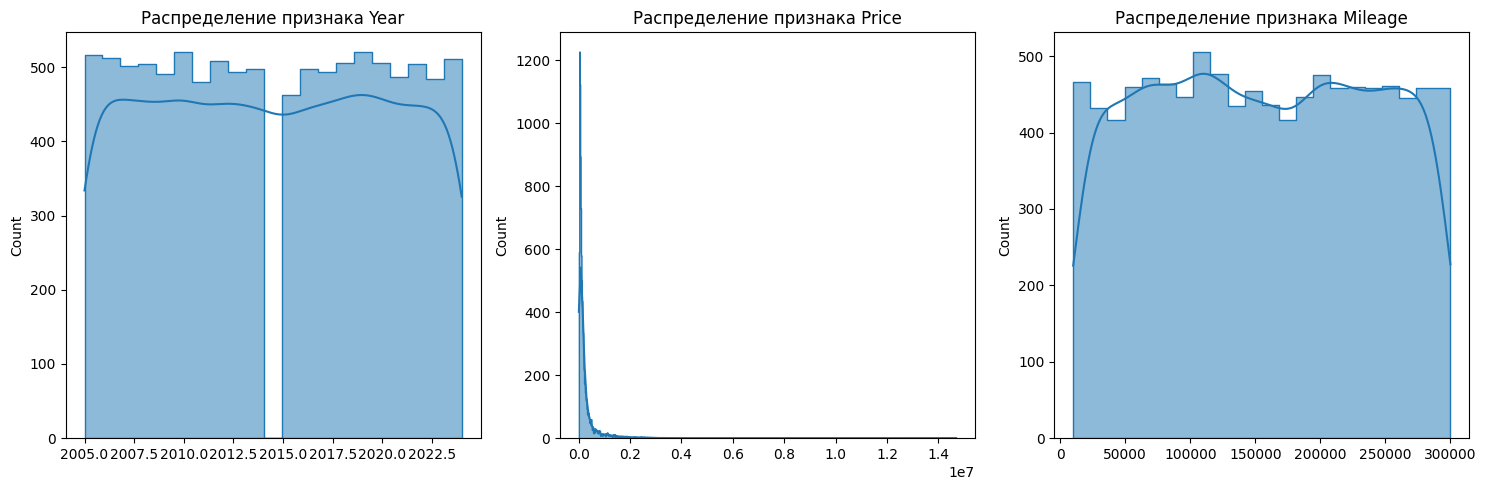

число машин с пробегом в диаппазоне от 100 000 до 120 000 наиболшее - их 500


In [23]:
# %%
#######################_Блок 6_#######################
print("#################_Анализ распределения признаков:_#################")

# Построим функцию, которая строит гистограмму распределения признаков
def plot_distribution(dataframe, n_cols = 3, exclude_cols = None):
    if exclude_cols is None:
        exclude_cols = []
    # Исправляем проверку типов данных
    num_features = [col for col in dataframe.columns
                    if col not in exclude_cols
                    and dataframe[col].dtype in [int64, float64]]
    # Тут мы считаем количество строк, которые будут в гистограмме, в каждой строке будет по n_cols гистограмм
    # np.ceil() - округляет вверх
    n_rows = int(np.ceil(len(num_features) / n_cols))
    # Функция subplots() создает массив осей (axes) для графика, визуально:
    # [[1, 2, 3], [4, 5, 6]]
    # fig - это сам график
    # axes - это массив осей
    # функция plt.subplots() - принимает количество строк и столбцов, figsize - это размер графика, принимает кортеж (ширина, высота)
    # Значение  5 * n_rows - это высота графика, 15 - это ширина графика
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 5 * n_rows))
    # функция flatten() - преобразует массив осей в одномерный массив
    # axes - представляет из себя массив осей, визуально:
    # [[1, 2, 3], [4, 5, 6]] -> [1, 2, 3, 4, 5, 6]
    axes = axes.flatten()
    # функция enumerate() - возвращает индекс и значение элемента в массиве
    for i, feature in enumerate(num_features):
        try:
            # Работаем уже с одной осью, и конкретным признаком
            ax = axes[i]
            # Исправляем передачу данных в histplot
            # sns - это библиотека seaborn, она предназначена для создания красивых графиков
            # histplot - это функция, которая строит гистограмму
            # data - это датафрейм, в котором находятся данные
            # x - это признак, который будет на гистограмме, то есть он будет распределен по оси x
            # hue - это признак, который будет использоваться для цветовой маркировки
            #
            # kde (Kernel Density Estimation) - это метод оценки плотности распределения данных
            # Когда kde=True, поверх гистограммы будет построена плавная кривая, показывающая
            # приближенную плотность распределения признака. Это помогает лучше визуализировать
            # форму распределения данных, сглаживая "ступенчатость" гистограммы.
            # Кривая строится с помощью усреднения множества нормальных распределений,
            # центрированных на каждом наблюдении
            #
            # ax - это ось, на которой будет построен график, ax - значит что график будет построен на оси ax
            # element = 'step' - это признак, который будет использоваться для построения графика, значение 'step' для построения графика в виде ступеней ещё есть
            # значения 'bars', 'poly', 'bars' это другие виды графиков
            #
            # palette - это признак, который будет использоваться для цветовой маркировки, значение ['skyblue', 'salmon'] для цветовой маркировки
            sns.histplot(data=dataframe, x=feature, kde=True, ax=ax, element='step', palette=['skyblue', 'salmon'])
            ax.set_title(f'Распределение признака {feature}')
            # Стоит ' ' - это означает что на оси x не будет подписей
            ax.set_xlabel('')
        # Ошибка np.linalg.LinAlgError - значит что признак не является числом
        except np.linalg.LinAlgError as e:
            print(f"Ошибка при построении графика для признака {feature}: {e}")
            print('Есть признак, в котором значния не являются числами {feature}')
            print('#################Ошибка {e}#################')
            sns.histplot(data=dataframe, x=feature, ax=ax, element='step', palette=['skyblue', 'salmon'])
            ax.set_title(f'Распределение признака {feature} (KDE skipped)')
            ax.set_xlabel('')
    # Уберем те оси, не использованные в построении, они могли появиться
    # 1) из-за ошибки
    # 2) из-за того что признак не является числом(но мы такое обработали в exception)
    for i in range(i + 1, len(axes)):
        # Параметр axis('off') - убирает оси
        axes[i].axis('off')
    # Параметр tight_layout() - подгоняет размеры графиков, чтобы они не накладывались друг на друга
    plt.tight_layout()
    plt.show()

exclude_from_plots = ['Description']
plot_distribution(df, exclude_cols = exclude_from_plots)

print("число машин с пробегом в диаппазоне от 100 000 до 120 000 наиболшее - их 500")

#################_Обнаружение и обработка выбросов_#################
Work with BoxPlot


<ipython-input-25-259ccac0162a>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, y=feature, ax=ax, palette=['skyblue'])
<ipython-input-25-259ccac0162a>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, y=feature, ax=ax, palette=['skyblue'])
<ipython-input-25-259ccac0162a>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, y=feature, ax=ax, palette=['skyblue'])


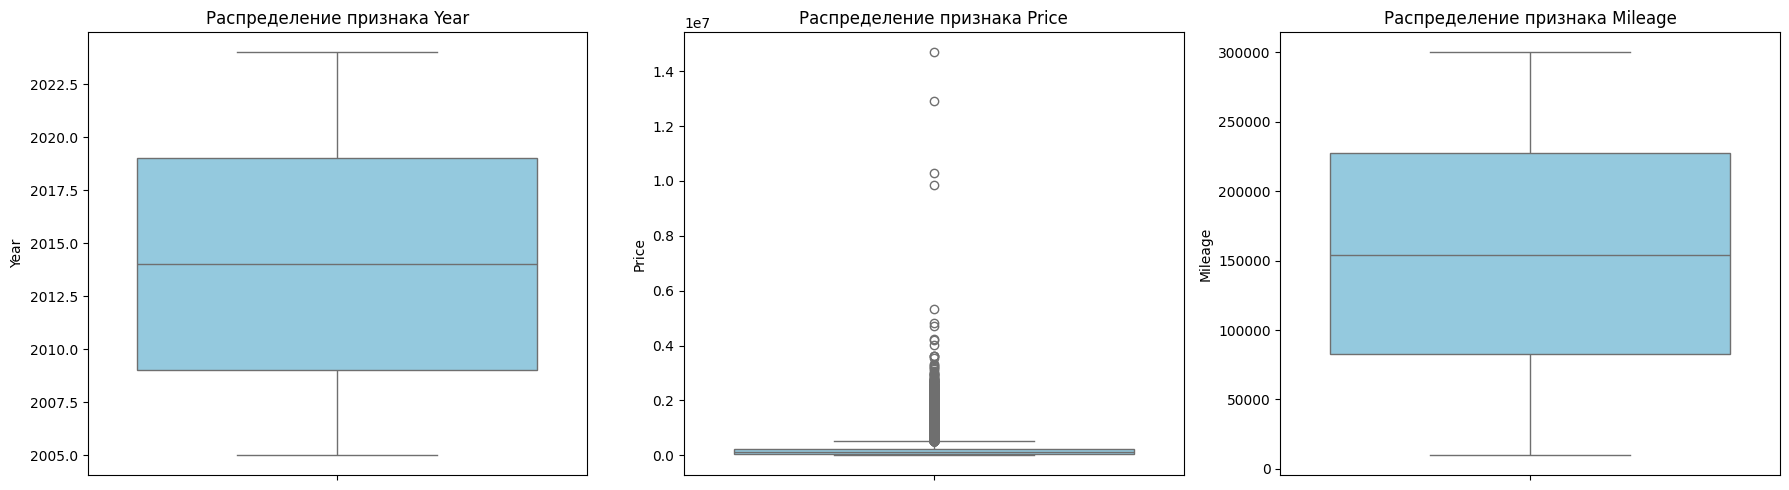

Признак Year: обнаружено 0 выбросов (0.00%)
Признак Price: обнаружено 1100 выбросов (11.00%)
Признак Mileage: обнаружено 0 выбросов (0.00%)
По анализу цены можем выдеть её нестабильность: имеются авто с большой ценой, но большинство авто не превышают цену в отметку 0.6


In [25]:
# %%
#######################_Блок 7_#######################
print("#################_Обнаружение и обработка выбросов_#################")

# Выбросы - это значения признаков, которые сильно отличаются от остальных значений признака
# Они могут сильно влиять на результаты модели
# Например, если в признаке income есть выбросы, то это может сильно исказить результаты модели

# Функция для отображения выбросов через boxplot
def plot_boxplot(dataframe, n_cols=3, exclude_cols=None):

    if exclude_cols is None:
        exclude_cols = []

    # Выбираем числовые признаки
    num_features = [col for col in dataframe.columns
                    if col not in exclude_cols
                    and dataframe[col].dtype in ['int64', 'float64']]

    n_rows = int(np.ceil(len(num_features) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

    axes = axes.flatten()

    for i, feature in enumerate(num_features):
        ax = axes[i]

        # y - это признак, который будет на оси y, то есть он будет распределен по оси y (Отличие от записи: ax = ax В том что ax - это ось, а y - это признак, который будет на оси y), если имеем дело с x, то:
        # x - это признак, который будет на оси x, то есть он будет распределен по оси x;
        #
        # palette - это признак, который будет использоваться для цветовой маркировки;
        sns.boxplot(data=dataframe, y=feature, ax=ax, palette=['skyblue'])
        ax.set_title(f'Распределение признака {feature}')

    # Выключаем пустые оси
    for i in range(i + 1, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Покажем выбросы через ящики с усами:
print("Work with BoxPlot")
plot_boxplot(df, exclude_cols=exclude_from_plots)

# Функция для обработки выбросов методом IQR
def handle_outlier(dataframe, columns):

    df_cleaned = dataframe.copy()

    for col in columns:
        # Определяем квартили
        Q_1 = df_cleaned[col].quantile(0.25)
        Q_3 = df_cleaned[col].quantile(0.75)

        IQR = Q_3 - Q_1

        # Определяем границы
        lower_bound = Q_1 - 1.5 * IQR
        upper_bound = Q_3 + 1.5 * IQR

        # Подсчёт количества выбросов
        outliers_count = ((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)).sum()
        percent_outliers = (outliers_count / len(df_cleaned)) * 100

        print(f"Признак {col}: обнаружено {outliers_count} выбросов ({percent_outliers:.2f}%)")

        # Ограничение значений признака в пределах допустимого диапазона
        df_cleaned[col] = df_cleaned[col].clip(lower_bound, upper_bound)

    return df_cleaned

# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
cols_for_outlier_detection = [col for col in numeric_features if col not in exclude_from_plots]

# Обработка выбросов с использованием IQR
df_cleaned = handle_outlier(df, cols_for_outlier_detection)


print("По анализу цены можем выдеть её нестабильность: имеются авто с большой ценой, но большинство авто не превышают цену в отметку 0.6")

Проведем анализ корреляции признаков


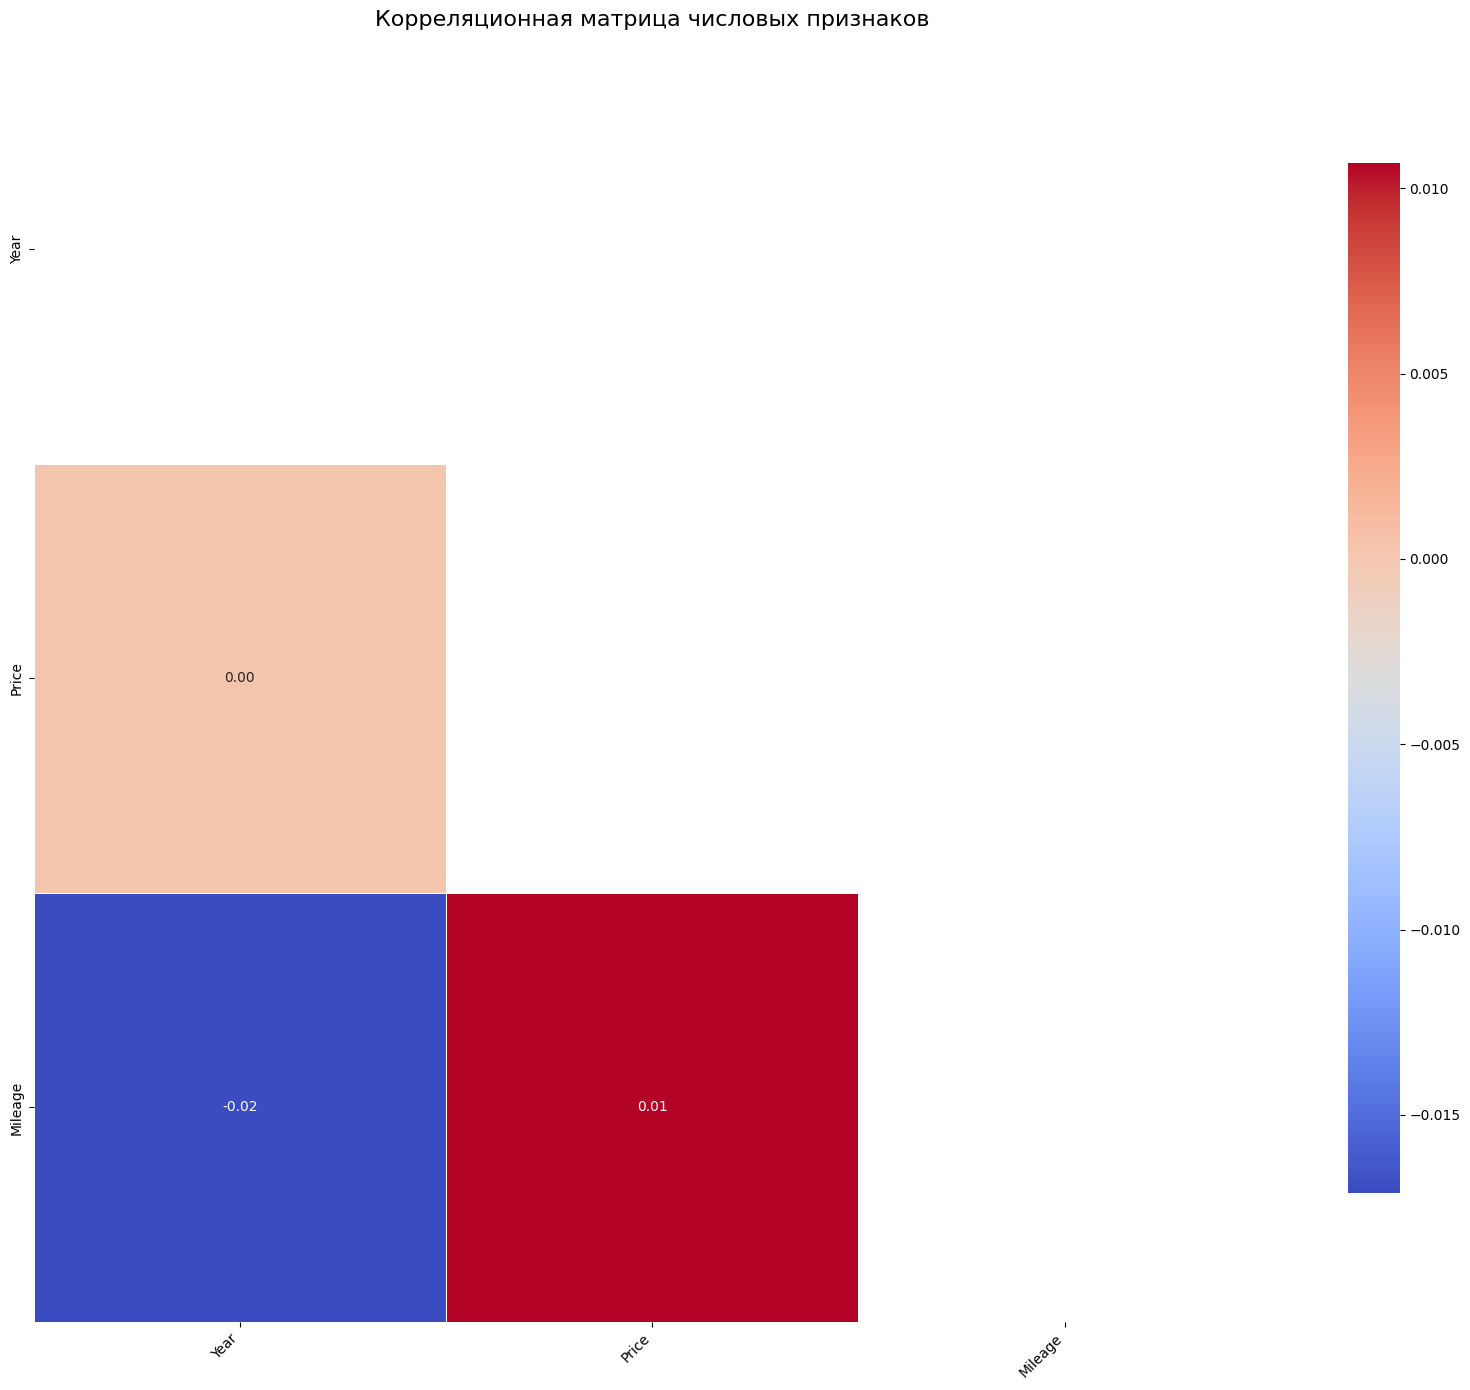

Видим явную коррелицию между пробегом авто и ценой за неё


In [24]:
# %%
#######################_Блок 8_############################################################################
print("Проведем анализ корреляции признаков")

# метод .figure() - создает фигуру
# figsize - это размер графика, принимает кортеж (ширина, высота)
plt.figure(figsize=(16, 14))

################################__О корреляции__################################
# В переменной corelation_matrix - имеем матрицу.
# Под капотом метод .corr() устроена формула Пирсона
# Формула Пирсона:
# r = (n * sum(x * y) - sum(x) * sum(y)) / sqrt((n * sum(x^2) - sum(x)^2) * (n * sum(y^2) - sum(y)^2))
# n - количество строк
# x - признак 1
# y - признак 2

# Она работает так:
# 1) Берется признак 1 и признак 2
# 2) Берется среднее значение признака 1 и признака 2
corelation_matrix = df.select_dtypes(include = ['number']).corr()

# Метод из библиотеки np .triu() создает верхний треугольник матрицы из списка corelation_matrix
mask = np.triu(corelation_matrix)

######################################__Построение тепловой карты__######################################
# Библиотека sns - библиотека seaborn, она предназначена для создания красивых графиков
# Метод heatmap() - создает тепловую карту
# параметр annot для того чтобы были надписи на графике
# Метод fmt - формат чисел на графике, Значение .2f означает что числа будут округлены до 2 знаков после запятой
# Метод cmap - цветовой профиль, Значение coolwarm означает что цвета будут меняться от синего до красного
# Метод mask - маска, Значение mask означает что на графике будут видны только верхний треугольник матрицы, то есть можем на figure наложить маску.
# Метод linewidths - ширина линий на графике, Значение 0.5 означает что линии будут иметь ширину 0.5
# Метод cbar_kws - параметры цветовой шкалы, Значение shrink для того чтобы уменьшить размер цветовой шкалы
sns.heatmap(corelation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            mask=mask, linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Корреляционная матрица числовых признаков', fontsize=16)

# Метод xticks() - подписывает оси x, параметр rotation=45, ha='right' - означает что подписи будут повернуты на 45 градусов и будут выровнены по правому краю
plt.xticks(rotation=45, ha='right')

# Метод tight_layout() - подгоняет размеры графиков, чтобы они не накладывались друг на друга
plt.tight_layout()
plt.show()


print("Видим явную коррелицию между пробегом авто и ценой за неё")


#################_Анализ связи признаков с целевым параметром (Price)_#################
Price      1.000000
Mileage    0.010685
Year       0.000188
Name: Price, dtype: float64


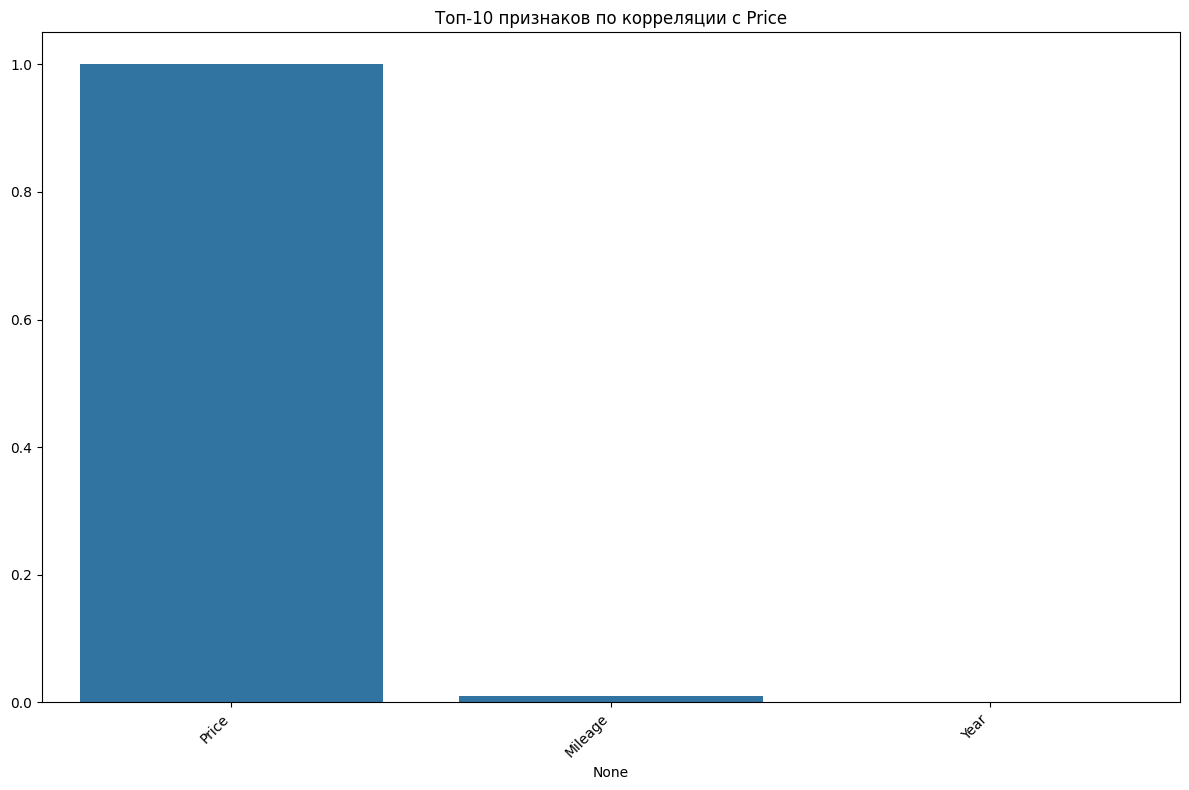

In [17]:
# %%
#######################_Блок 9_#######################
print("#################_Анализ связи признаков с целевым параметром (Price)_#################")
# То есть посмотрим на то, на сколько коррелируют признаки с целевым признаком Price
# Метод .sort_values() - сортирует значения признака по убыванию
# ascending=False - означает что сортировка будет по убыванию

target_corelation = corelation_matrix['Price'].sort_values(ascending=False)
print(target_corelation)
# Покажем это наглядно:
plt.figure(figsize=(12, 8))
sns.barplot(x=target_corelation.index[:10], y=target_corelation.values[:10])
plt.title('Топ-10 признаков по корреляции с Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#################_Изучение зависимости между признаками_#################


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


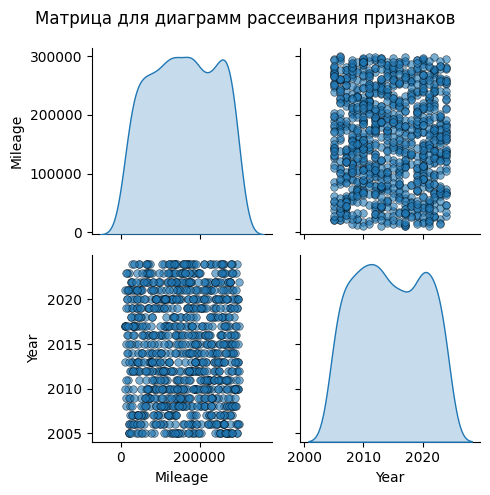

In [18]:
# %%
#######################_Блок 10_#######################
print("#################_Изучение зависимости между признаками_#################")
# Изучение зависимости между признаками — это более широкий и комплексный подход, который включает анализ любых взаимосвязей
# (линейных и нелинейных) между переменными с использованием различных методов (визуализация, регрессионный анализ, методы машинного обучения и т.д.).
# В то же время анализ корреляции — это специализированный метод,
# ориентированный преимущественно на измерение степени линейной зависимости между двумя признаками с помощью коэффициентов (например, коэффициента Пирсона).
# Таким образом, корреляционный анализ является лишь одним из инструментов в рамках общего изучения взаимосвязей между признаками.
#
# Что такое scatter plot?
# Scatter plot — это график, который показывает зависимость между двумя признаками.
# Он состоит из точек, которые показывают значения признаков.


def bild_scatter_plot(dataframe, features, target_col = 'Price'):
    # Создадим подвыборку для быстроты построения
    if len(dataframe) > 1000:
        sample_dataframe = dataframe.sample(1000, random_state = 42)
    else:
        sample_dataframe = dataframe

#Создадим pairplot - Это парные диаграммы рассеивания, для того, чтобы отследить каждого признака с каждым
# data=sample_df - для одщих данных, всех данных
# vars=features - для признаков, которые будут использоваться для построения графика
# hue=target_col -
# diag_kind='kde' -
# palette=['skyblue', 'salmon'] -
# plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'} - для параметров графика, в данном случае это alpha - прозрачность, s - размер точек, edgecolor - цвет точек
    sns.pairplot(data=sample_dataframe, vars=features, diag_kind='kde',
                 palette=['skyblue', 'salmon'], plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'})
    plt.suptitle("Матрица для диаграмм рассеивания признаков")
    plt.tight_layout()
    plt.show()

# Что возвращает метод .index?
# Метод .index возвращает индексы признаков, то есть имена признаков, например:
#  ['Price', 'Make', 'Model', 'Year', 'Mileage', 'Body Type', 'Cylinders', 'Transmission', 'Fuel Type', 'Color', 'Location', 'Description']
# Что за синтаксис такой:
# [...][:5]
# Это срез списка, то есть мы берем первые 5 элементов списка
top_features = [col for col in target_corelation.index if col not in ['Price', 'Description']][:5]
bild_scatter_plot(df_cleaned, top_features)



In [19]:
# %%
#######################_Блок 11_#######################
print("#########Трансформация и логарифмическое преобразование признаков#########")
# Функция для логарифмического преобразования признаков с асимметричным распределением
# Асимметричное распределение - это когда распределение признака не симметрично, то есть одна сторона распределения тяжелее другой
def log_transform(dataframe, features):
    df_transformed = dataframe.copy()
    for feature in features:
        min_value = df_transformed[feature].min()
        if min_value <= 0:
            # Добавим константу, чтобы все значения были положительными
            shift = abs(min_value) + 1
            df_transformed[feature] = df_transformed[feature] + shift
            df_transformed[feature] = np.log1p(df_transformed[feature])
            print(f"Применено log-преобразование к {feature} с добавлением константы {shift}")
        else:
            df_transformed[feature] = np.log1p(df_transformed[feature])
            print(f"Применено log-преобразование к {feature}")
    return df_transformed

# Выбрали признаки с асимметричным распределением (например, Price и Mileage)
skewed_features = ['Price', 'Mileage']
print("Применение логарифмического преобразования к признакам с асимметричным распределением:")
df_transformed = log_transform(df_cleaned, skewed_features)



#########Трансформация и логарифмическое преобразование признаков#########
Применение логарифмического преобразования к признакам с асимметричным распределением:
Применено log-преобразование к Price
Применено log-преобразование к Mileage


In [20]:
# %%
#######################_Блок 12_#######################
print("#########Масштабирование признаков#########")
# Масштабирование признаков - это процесс приведения признаков к одному масштабу
# Это необходимо для того, чтобы модели машинного обучения работали лучше
def scale_features(dataframe, features, type_scaling = 'standard'):
    df_scaled = dataframe.copy()
    if type_scaling == 'standard':
        scaler = StandardScaler()
    elif type_scaling == 'minmax':
        scaler = MinMaxScaler()

    # Масштабирование в зависимости от типа масштабирования
    scaled_features = scaler.fit_transform(dataframe[features])
    # Добавим отмасштабированные признаки в датафрейм
    # Что за синтаксис f'{feature}{suffix}'
    # Это форматирование строки, то есть мы берем признак и добавляем к нему suffix

    suffix = '_scaled'
    for i, feature in enumerate(features):
        df_scaled[f'{feature}{suffix}'] = scaled_features[:, i]
        print(f"Применено {type_scaling} масштабирование к {feature}")
    return df_scaled, scaler

features_to_scale = [col for col in df_transformed.select_dtypes(include=['number']).columns if col not in ['Price']]
# Применение StandardScaler
df_scaled, scaler = scale_features(df_transformed, features_to_scale, type_scaling = 'standard')
# Применение MinMaxScaler
df_scaled_minmax, scaler_minmax = scale_features(df_transformed, features_to_scale, type_scaling = 'minmax')



#########Масштабирование признаков#########
Применено standard масштабирование к Year
Применено standard масштабирование к Mileage
Применено minmax масштабирование к Year
Применено minmax масштабирование к Mileage


#############_Выделение признаков с помощью feature importance_#############
              Feature        Score        P-value
569      Cylinders_12  1335.544322  1.436745e-274
571       Cylinders_4  1177.458512  4.759110e-244
266     Model_g-class   980.177954  2.404867e-205
574       Cylinders_8   773.973879  3.933545e-164
55   Make_rolls-royce   640.504603  5.025472e-137
..                ...          ...            ...
21       Make_genesis     0.002224   9.623834e-01
95           Model_4c     0.000372   9.846039e-01
226      Model_e-pace     0.000273   9.868213e-01
275      Model_giulia     0.000267   9.869666e-01
304          Model_h2     0.000148   9.903061e-01

[615 rows x 3 columns]
                Feature        Score        P-value
569        Cylinders_12  1335.544322  1.436745e-274
571         Cylinders_4  1177.458512  4.759110e-244
266       Model_g-class   980.177954  2.404867e-205
574         Cylinders_8   773.973879  3.933545e-164
55     Make_rolls-royce   640.504603  5

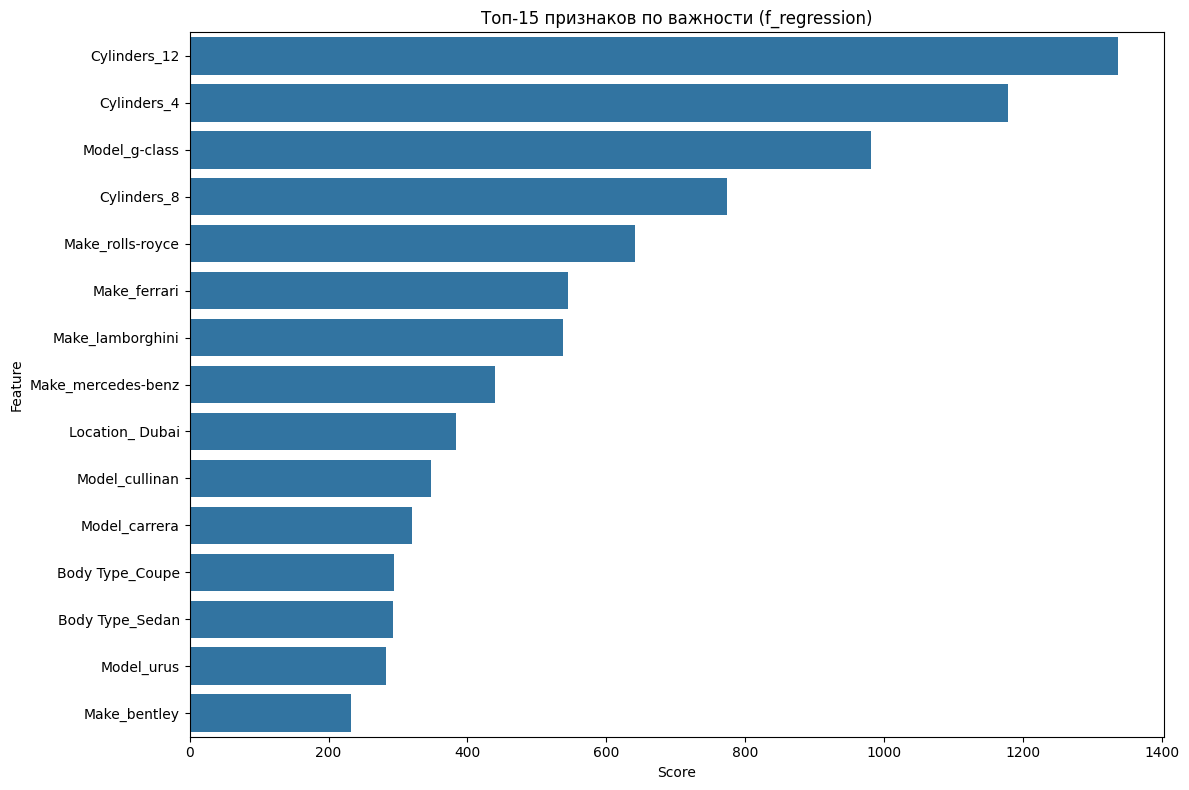


Оценка важности признаков с помощью RandomForest:
              Feature  Importance
569      Cylinders_12    0.114784
1             Mileage    0.094378
266     Model_g-class    0.072579
574       Cylinders_8    0.064181
0                Year    0.056155
..                ...         ...
91   Model_458-spider    0.000000
93      Model_488-gtb    0.000000
90   Model_458-italia    0.000000
94   Model_488-spider    0.000000
89          Model_458    0.000000

[615 rows x 2 columns]


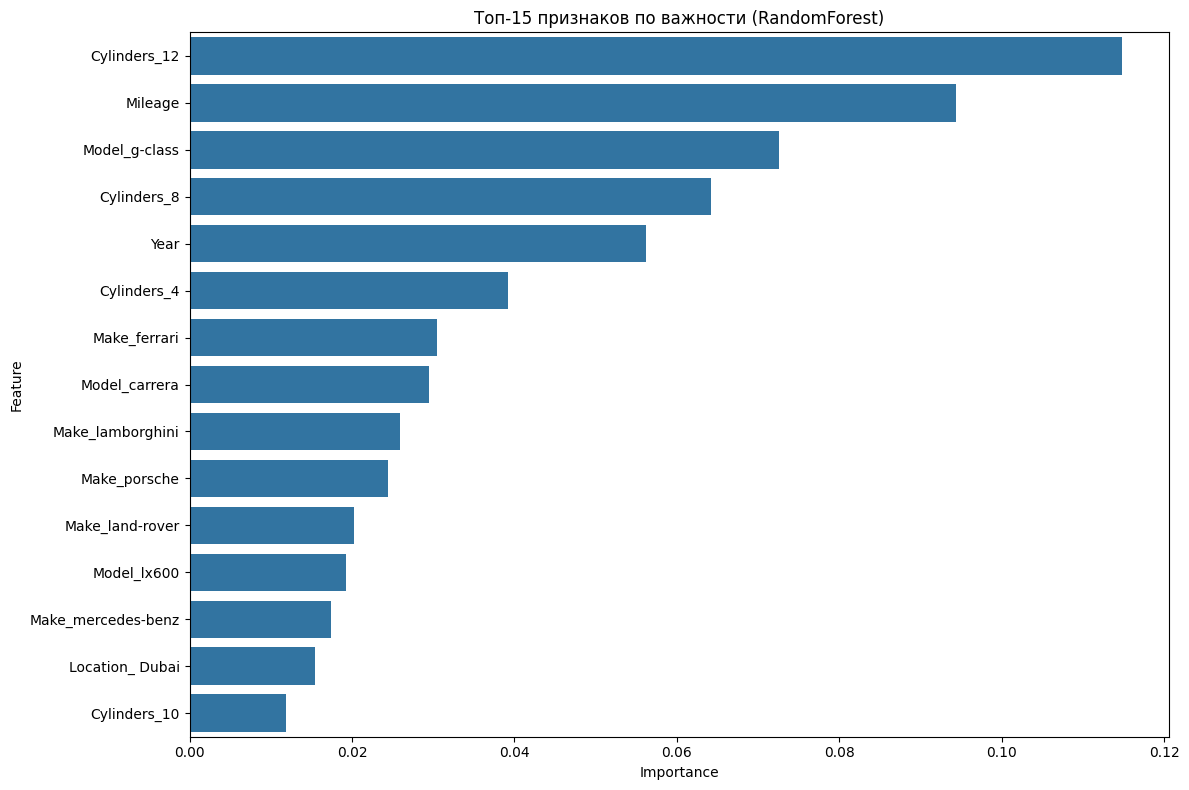

In [21]:
# %%
#######################_Блок 13_#######################
print("#############_Выделение признаков с помощью feature importance_#############")
# метод .drop() - удаляет признаки из датафрейма
# Выделяем признаки: удаляем целевой параметр Price и Description
X = df_cleaned.drop(['Price', 'Description'], axis=1)
y = df_cleaned['Price']
# Преобразуем категориальные признаки в числовые (если они есть) с помощью get_dummies
X = pd.get_dummies(X)
# Оценим важность признаков при помощи SelectKBest (функция для регрессии)
# Параметр k означает что мы выберем k признаков с наибольшей важностью
# Параметр score_func = f_regression означает что мы будем использовать F-статистику для оценки важности признаков
# (F статистика простыми словами это отношение дисперсии к среднему квадратичному отклонению)
selector = SelectKBest(score_func = f_regression, k='all')
# Метод .fit() - обучает модель
selector.fit(X, y)
# Создадим отдельный DataFrame с оценёнными признаками
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_,
    'P-value': selector.pvalues_
})
# значение by = 'Score' - означает что мы сортируем признаки по убыванию значения F-статистики
# ascending = False - означает что мы сортируем по убыванию
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)
print(feature_scores.head(10))
plt.figure(figsize=(12, 8))
# barplot - это график, который показывает зависимость между двумя признаками
# x='Score' - означает что мы берем значения F-статистики
# y='Feature' - означает что мы берем признаки
# data=feature_scores.head(15) - означает что мы берем первые 15 признаков
sns.barplot(x='Score', y='Feature', data=feature_scores.head(15))
plt.title('Топ-15 признаков по важности (f_regression)')
plt.tight_layout()
plt.show()
##### Ещё один способ выделить важные признаки, но только уже при помощи RandomForest ????
# Оценка важности признаков с помощью RandomForest
print("\nОценка важности признаков с помощью RandomForest:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
# Создаем DataFrame с оценками важности признаков из RandomForest
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
rf_feature_importance = rf_feature_importance.sort_values('Importance', ascending=False)
print(rf_feature_importance)
# Визуализация оценок важности признаков от RandomForest
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.head(15))
plt.title('Топ-15 признаков по важности (RandomForest)')
plt.tight_layout()
plt.show()
